In [181]:
# how to install textblob
# !pip install textblob
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re
from textblob import TextBlob

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package wordnet to /home/wagner/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/wagner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/wagner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [182]:
df = pd.read_csv('chatgpt1.csv')

In [183]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [184]:
df.sample(20)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
4262,2023-01-22 17:36:15+00:00,1617214575761575936,What Tiktok did to reshape social media spends...,KhaitanAnkur,https://twitter.com/KhaitanAnkur/status/161721...,https://twitter.com/KhaitanAnkur,NaN,NaN,0,0,0,0,1617214575761575936,en,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#D2C', '#ChatGPT', '#consumerism']",3
11509,2023-01-23 01:41:29+00:00,1617336688237514752,The ChatGPT response to leading for creativity...,teacherslcs,https://twitter.com/teacherslcs/status/1617336...,https://twitter.com/teacherslcs,['https://whakataukihewakaekenoa.blogspot.com/...,['https://t.co/Lh0GpNHF79'],0,0,0,0,1617336688237514752,en,"<a href=""https://twitter.com/teacherlcs"" rel=""...",NaN,NaN,NaN,[],0
17475,2023-01-23 08:17:08+00:00,1617436256077754369,@DrSolanaNFT I am a bit surprised that ChatGPT...,gaeaphile,https://twitter.com/gaeaphile/status/161743625...,https://twitter.com/gaeaphile,NaN,NaN,0,0,0,0,1617421139726446594,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='DrSolanaNFT', id=7824381237038...",[],0
37020,2023-01-23 20:27:23+00:00,1617620028622311438,¿Los asustó ChatGPT?: Google incluirá funcione...,iproup,https://twitter.com/iproup/status/161762002862...,https://twitter.com/iproup,['https://www.iproup.com/innovacion/37569-mied...,['https://t.co/tLphoQHLCo'],0,0,0,0,1617620028622311438,es,"<a href=""https://www.echobox.com"" rel=""nofollo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,[],0
5040,2023-01-22 18:24:00+00:00,1617226589984415744,No he curioseado aún lo de chat gpt xq ls 2 ve...,Larili_R,https://twitter.com/Larili_R/status/1617226589...,https://twitter.com/Larili_R,NaN,NaN,1,0,1,0,1617226589984415744,es,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,NaN,NaN,[],0
40160,2023-01-23 22:39:32+00:00,1617653284906631169,"ChatGPT generates text, and Grammarly complain...",SergiiKirianov,https://twitter.com/SergiiKirianov/status/1617...,https://twitter.com/SergiiKirianov,NaN,NaN,6,1,22,0,1617653284906631169,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,[],0
40793,2023-01-23 23:09:55+00:00,1617660933014454272,@StevenBrust Depends on ChatGPT's position on ...,den_down_unda,https://twitter.com/den_down_unda/status/16176...,https://twitter.com/den_down_unda,NaN,NaN,0,0,0,0,1617635918134796291,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='StevenBrust', id=45109741, dis...",[],0
4457,2023-01-22 17:47:59+00:00,1617217524747350017,@davidpapineau @Going_Loopy But what is ChatGP...,LukeKaven,https://twitter.com/LukeKaven/status/161721752...,https://twitter.com/LukeKaven,NaN,NaN,0,0,1,0,1616913366584557569,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='davidpapineau', id=72796877, d...",[],0
28769,2023-01-23 15:57:13+00:00,1617552038719782912,by using arguments told to them by chat gpt us...,nadinsfw,https://twitter.com/nadinsfw/status/1617552038...,https://twitter.com/nadinsfw,NaN,NaN,0,0,0,0,1617552036513579009,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,[],0
1216,2023-01-22 14:49:19+00:00,1617172562626183169,Evolução dos trabalhos escolares:\n\n- Bibliot...,humor_economico,https://twitter.com/humor_economico/status/161...,https://twitter.com/humor_economico,NaN,NaN,5,8,84,0,1617172562626183169,pt,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,[],0


In [185]:
df.shape

(50001, 20)

In [186]:
list(df.columns)

['Datetime',
 'Tweet Id',
 'Text',
 'Username',
 'Permalink',
 'User',
 'Outlinks',
 'CountLinks',
 'ReplyCount',
 'RetweetCount',
 'LikeCount',
 'QuoteCount',
 'ConversationId',
 'Language',
 'Source',
 'Media',
 'QuotedTweet',
 'MentionedUsers',
 'hashtag',
 'hastag_counts']

In [187]:
df.select_dtypes(include=[int,float]).columns

Index(['Tweet Id', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount',
       'ConversationId', 'hastag_counts'],
      dtype='object')

In [188]:
# variables log transform
df['LikeCount'] = np.log1p(df['LikeCount'])
df['QuoteCount'] = np.log1p(df['QuoteCount'])
df['ReplyCount'] = np.log1p(df['ReplyCount'])
df['RetweetCount'] = np.log1p(df['RetweetCount'])


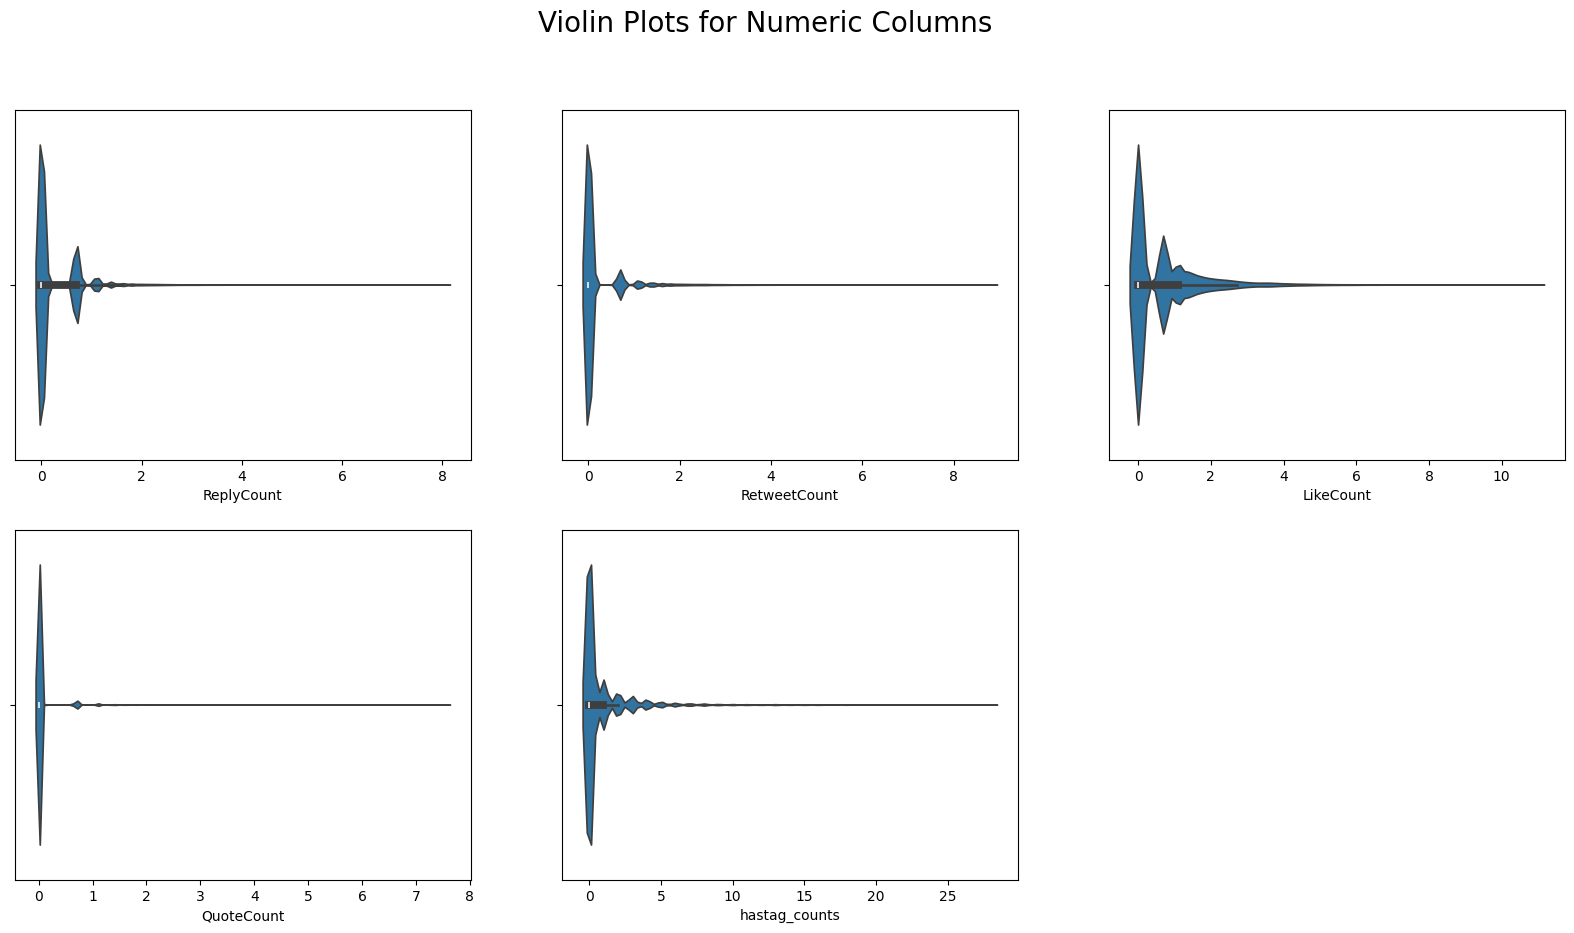

In [189]:
# violin plot for the numeric columns with subplots
plt.figure(figsize=(20, 10))
# put a general title for all the subplots
plt.suptitle('Violin Plots for Numeric Columns', fontsize=20)
plt.subplot(2, 3, 1)
sns.violinplot(x='ReplyCount', data=df)
plt.subplot(2, 3, 2)
sns.violinplot(x='RetweetCount', data=df)
plt.subplot(2, 3, 3)
sns.violinplot(x='LikeCount', data=df)
plt.subplot(2, 3, 4)
sns.violinplot(x='QuoteCount', data=df)
plt.subplot(2, 3, 5)
sns.violinplot(x='hastag_counts', data=df)
plt.show()


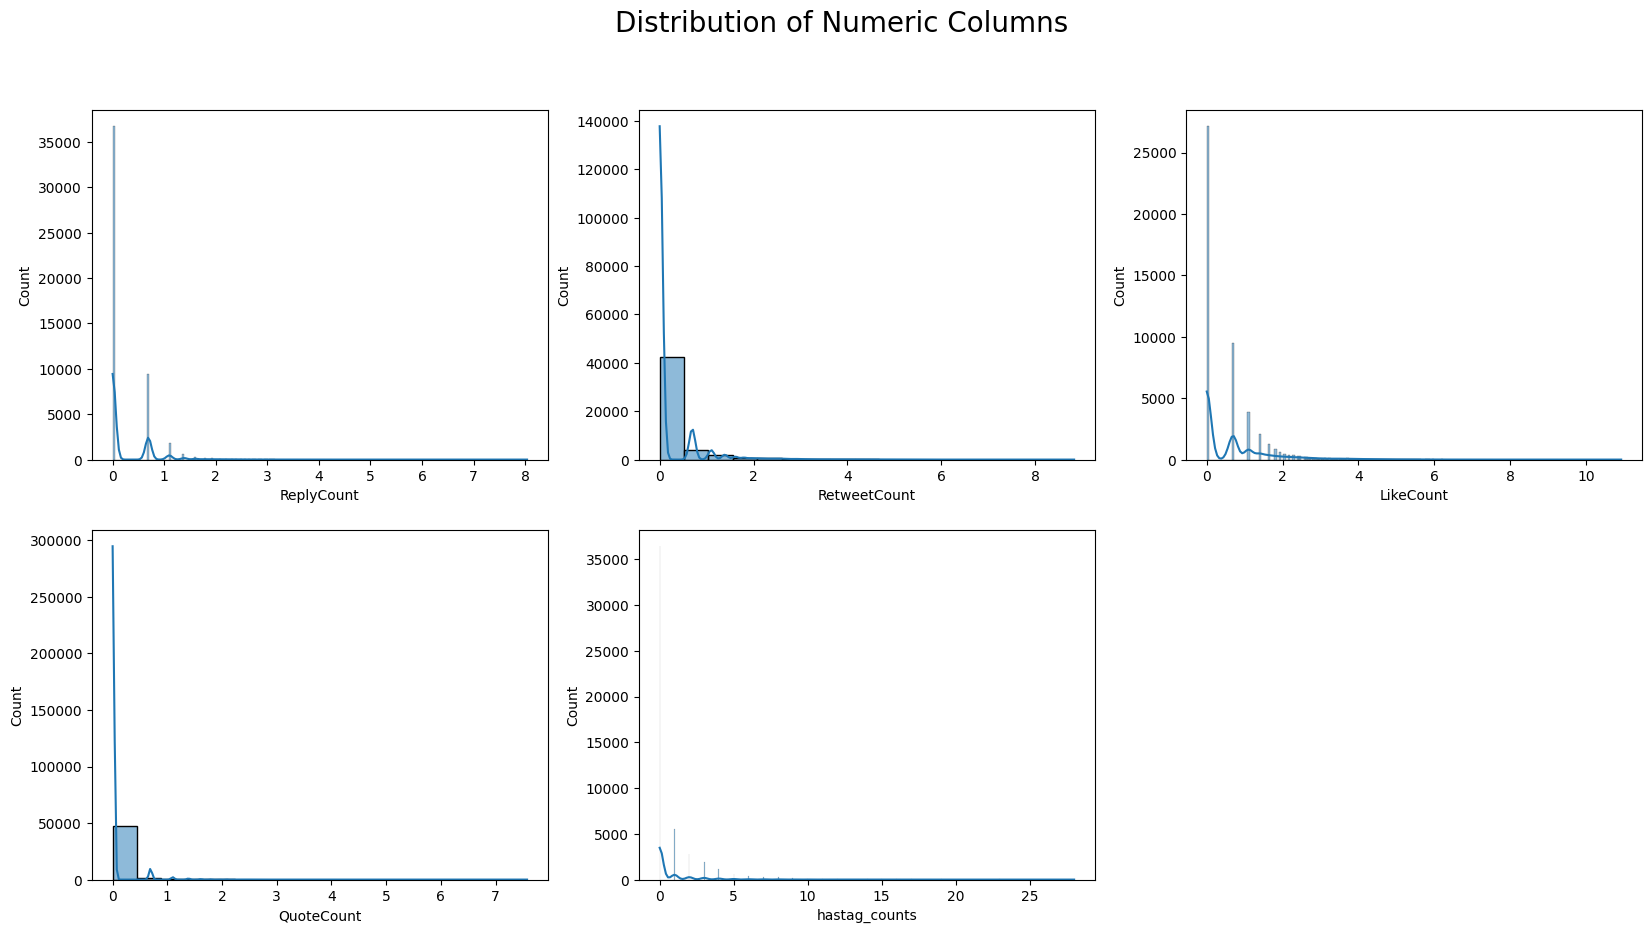

In [190]:
# do the same for the distribution of the numeric columns
plt.figure(figsize=(20, 10))
# put a general title for all the subplots
plt.suptitle('Distribution of Numeric Columns', fontsize=20)
plt.subplot(2, 3, 1)
sns.histplot(df['ReplyCount'], kde=True)
plt.subplot(2, 3, 2)
sns.histplot(df['RetweetCount'],kde=True)
plt.subplot(2, 3, 3)
sns.histplot(df['LikeCount'], kde=True)
plt.subplot(2, 3, 4)
sns.histplot(df['QuoteCount'], kde=True)
plt.subplot(2, 3, 5)
sns.histplot(df['hastag_counts'], kde=True)
plt.show()

In [191]:
df['Tweet Id'].nunique()

50001

In [192]:
df['ConversationId'].nunique()

41430

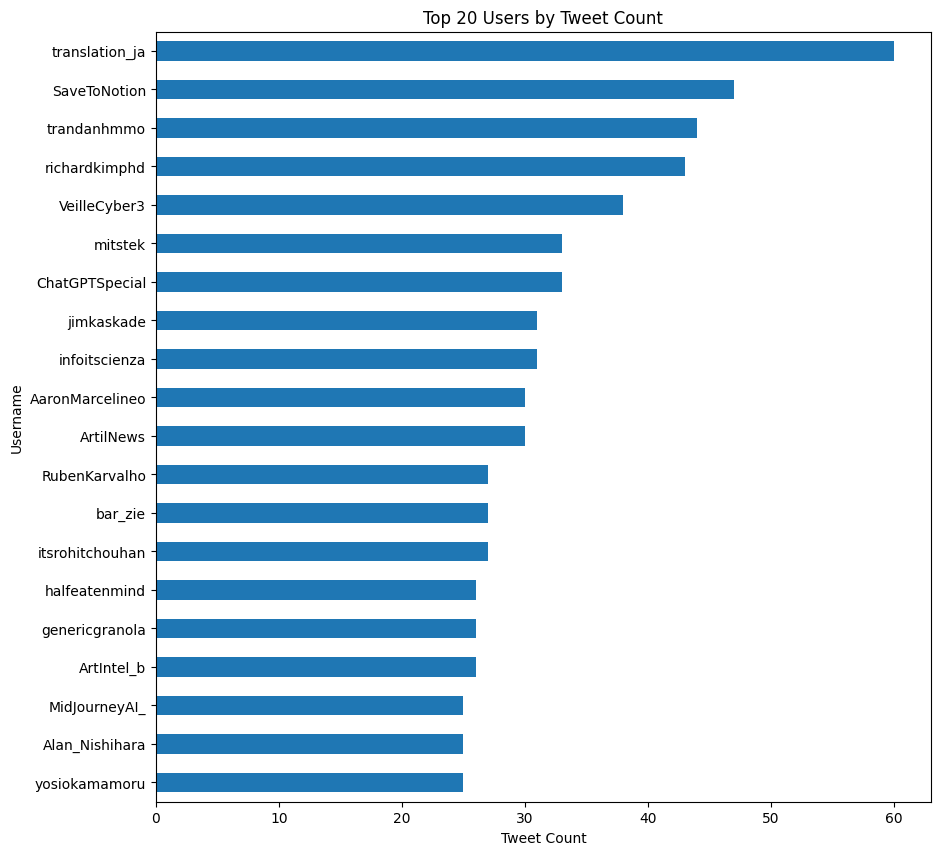

In [193]:
df['Username'].value_counts().sort_values(ascending=True)[-20:].plot(kind='barh', figsize=(10, 10))
plt.title('Top 20 Users by Tweet Count')
plt.xlabel('Tweet Count')
plt.ylabel('Username')
plt.show()

In [194]:
df['User'].value_counts()#.sort_values(ascending=True)[-20:].plot(kind='barh', figsize=(10, 10))

User
https://twitter.com/translation_ja    60
https://twitter.com/SaveToNotion      47
https://twitter.com/trandanhmmo       44
https://twitter.com/richardkimphd     43
https://twitter.com/VeilleCyber3      38
                                      ..
https://twitter.com/masayume_32        1
https://twitter.com/WRoughSketch       1
https://twitter.com/ayazfarooqui       1
https://twitter.com/Technology_GD      1
https://twitter.com/AmericoSD_69       1
Name: count, Length: 38433, dtype: int64

In [195]:
df['Permalink'].value_counts()

Permalink
https://twitter.com/mochico0123/status/1617156270871699456        1
https://twitter.com/sale_15x/status/1617586686455578627           1
https://twitter.com/dailyrotation/status/1617586488383836160      1
https://twitter.com/golantrevize000/status/1617586499196682245    1
https://twitter.com/elie2222/status/1617586504309821442           1
                                                                 ..
https://twitter.com/lemmk/status/1617424305293336576              1
https://twitter.com/collect0r_nft/status/1617424313996525570      1
https://twitter.com/0xMarko/status/1617424358258909184            1
https://twitter.com/ITNewsFrance/status/1617424355960422401       1
https://twitter.com/AmericoSD_69/status/1617778733355790342       1
Name: count, Length: 50001, dtype: int64

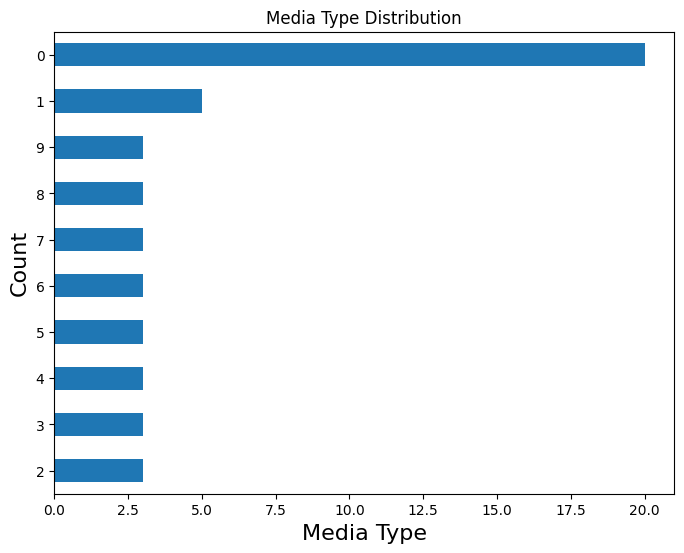

In [196]:
pd.Series(df['Media'].value_counts().values[:10]).sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Media Type Distribution')
plt.xlabel('Media Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

<Axes: ylabel='Language'>

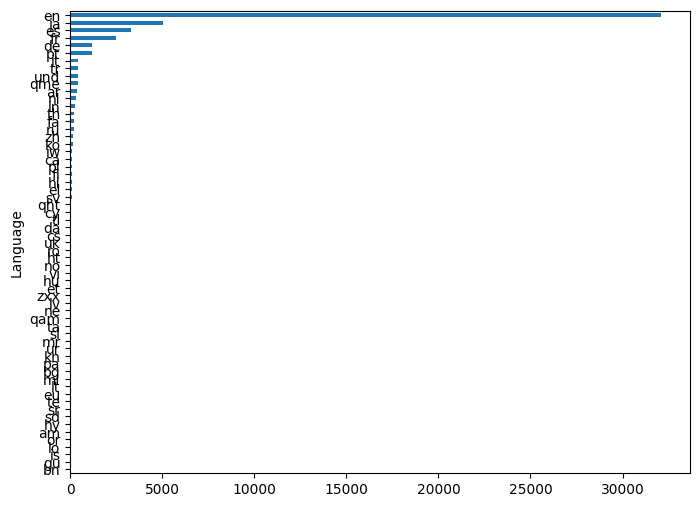

In [197]:
df['Language'].value_counts().sort_values().plot(kind='barh', figsize=(8, 6))

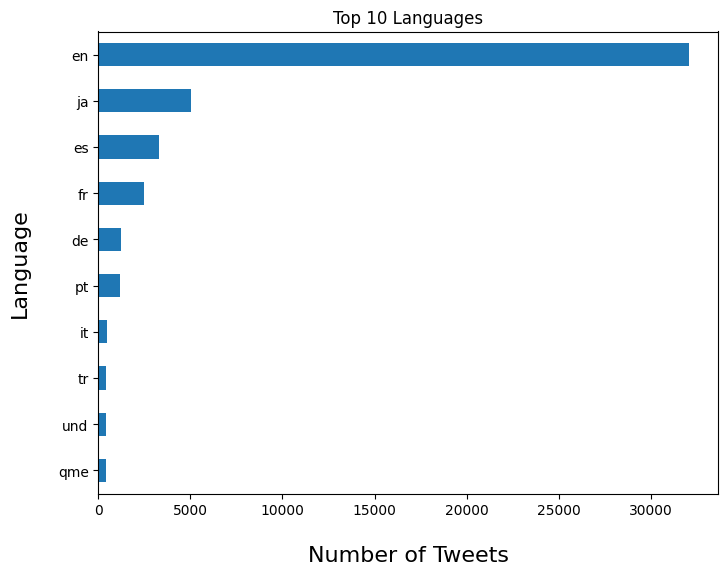

In [198]:
# the top 10 languages
df['Language'].value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Languages')
plt.xlabel('Number of Tweets', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Language', labelpad=20, fontsize=16)

plt.show()

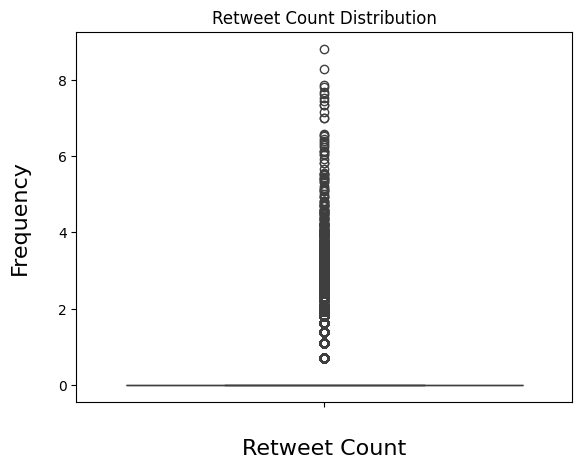

In [199]:
sns.boxplot(y='RetweetCount', data=df)
plt.title('Retweet Count Distribution')
plt.xlabel('Retweet Count', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

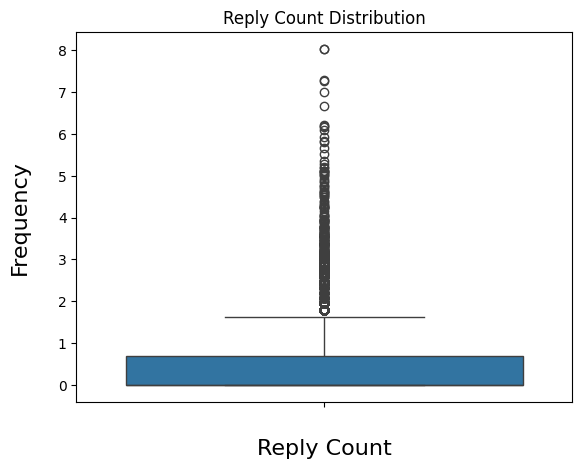

In [200]:
sns.boxplot(y='ReplyCount', data=df)
plt.title('Reply Count Distribution')
plt.xlabel('Reply Count', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

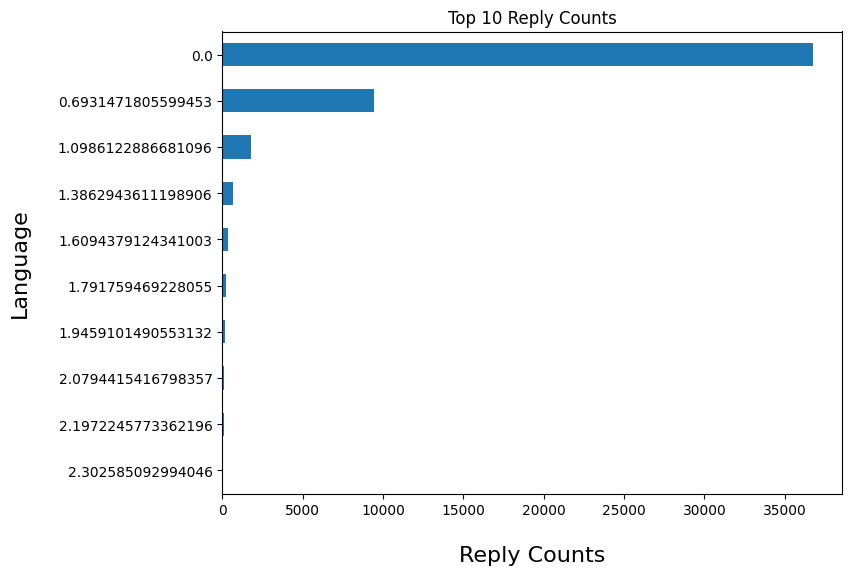

In [201]:
df['ReplyCount'].value_counts().sort_values(ascending=False).iloc[:10].sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Reply Counts')
plt.xlabel('Reply Counts', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Language', labelpad=20, fontsize=16)
plt.show()

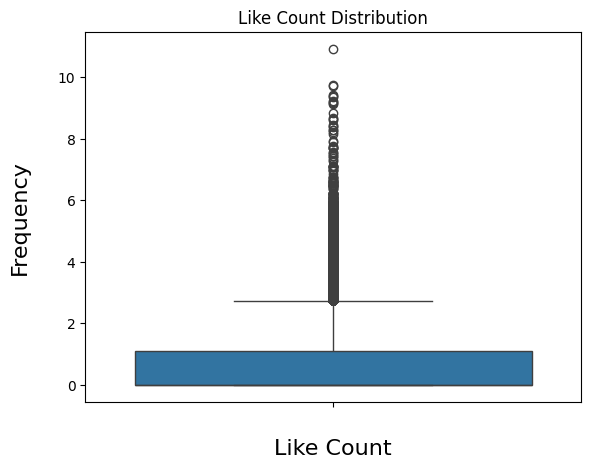

In [202]:
sns.boxplot(y='LikeCount', data=df)
plt.title('Like Count Distribution')
plt.xlabel('Like Count', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

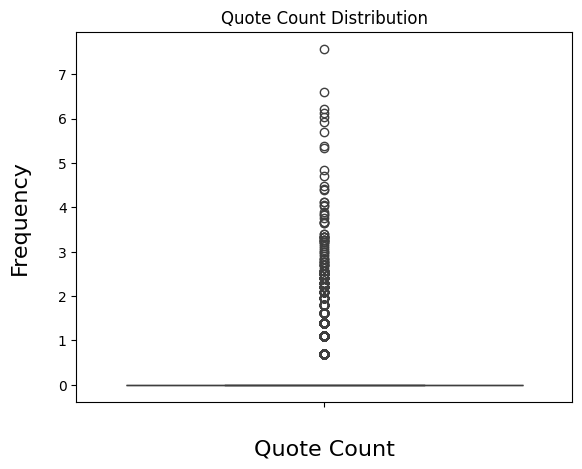

In [203]:
sns.boxplot(y='QuoteCount', data=df)
plt.title('Quote Count Distribution')
plt.xlabel('Quote Count', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

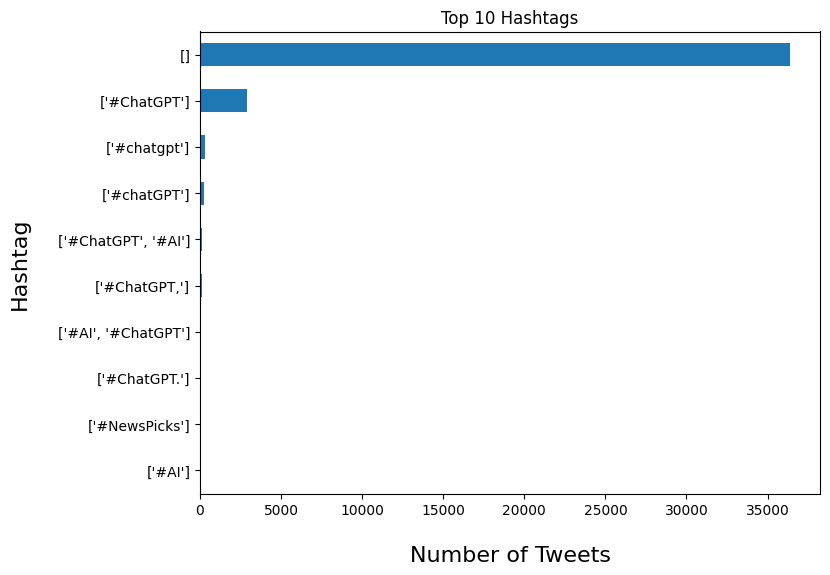

In [204]:
df['hashtag'].value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Hashtags')
plt.xlabel('Number of Tweets', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Hashtag', labelpad=20, fontsize=16)
plt.show()

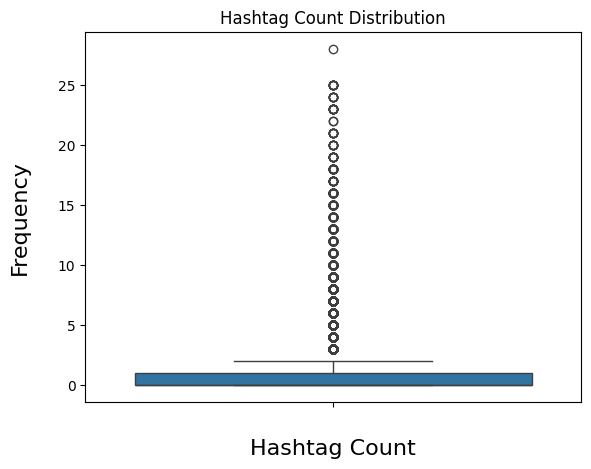

In [205]:
sns.boxplot(y='hastag_counts', data=df)
plt.title('Hashtag Count Distribution')
plt.xlabel('Hashtag Count', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

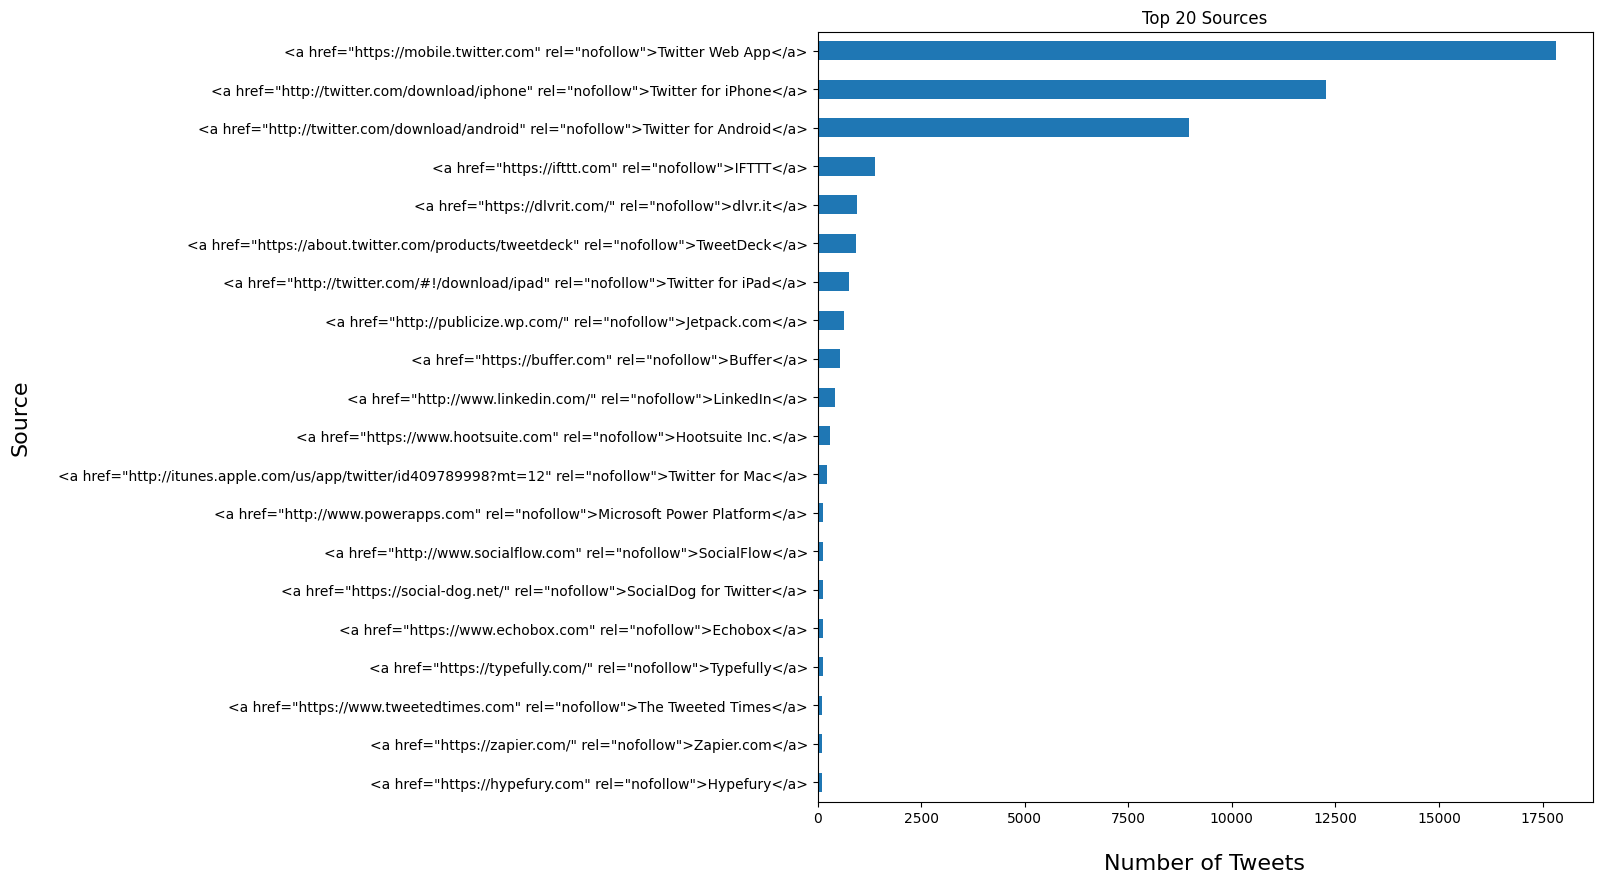

In [206]:
df['Source'].value_counts().sort_values(ascending=True)[-20:].plot(kind='barh', figsize=(10, 10))
plt.title('Top 20 Sources')
plt.xlabel('Number of Tweets', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Source', labelpad=20, fontsize=16)
plt.show()


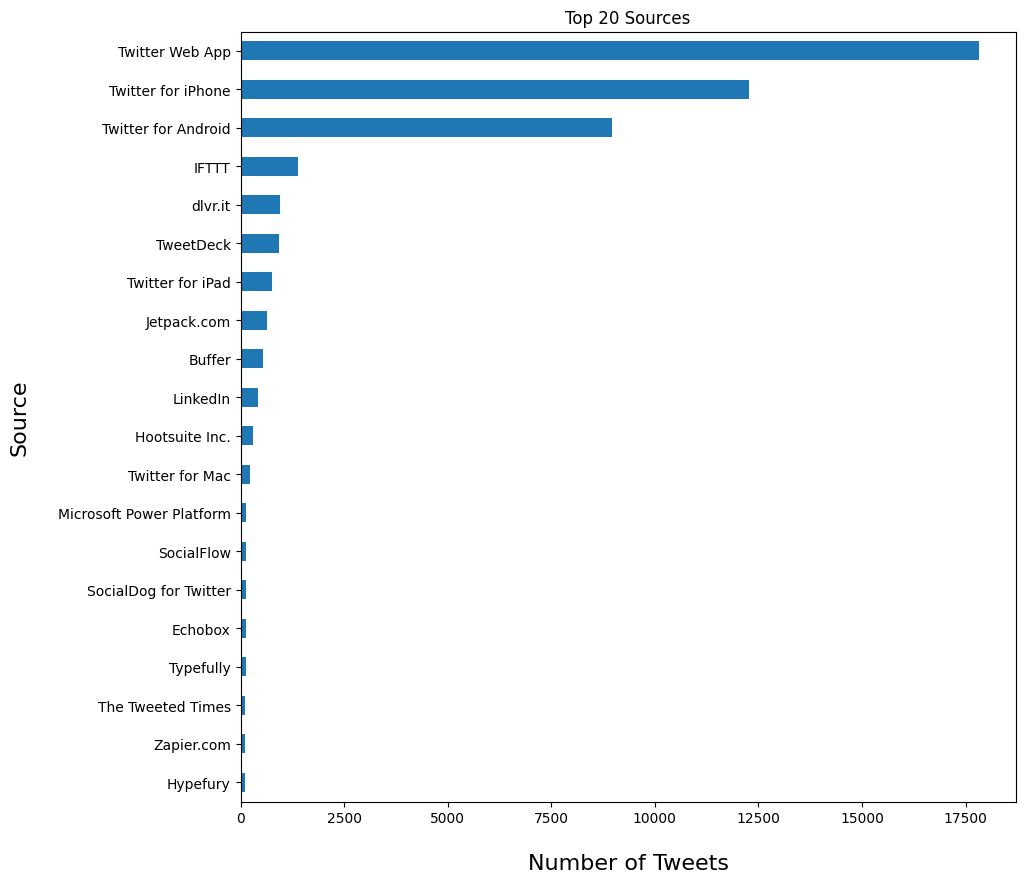

In [207]:
# just get what is between the <a> tag in HTML
df['Source'] = df['Source'].apply(lambda x: re.findall(r'>(.*?)<', x)[0])
df['Source'].value_counts().sort_values(ascending=True)[-20:].plot(kind='barh', figsize=(10, 10))
plt.title('Top 20 Sources')
plt.xlabel('Number of Tweets', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Source', labelpad=20, fontsize=16)
plt.show()

/tmp/ipykernel_33885/3050584224.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Source', y='LikeCount', data=df, palette='Set2')


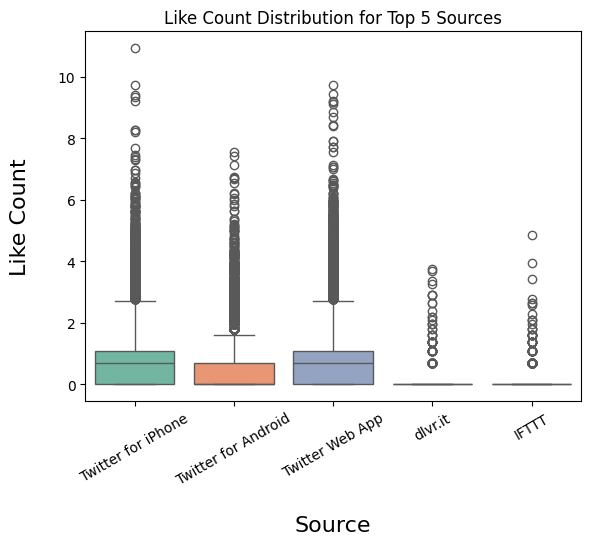

In [221]:
# top 3 sources
top5_sources = list(df['Source'].value_counts().sort_values(ascending=False)[:5].index)
df = df[df['Source'].isin(top5_sources)]
sns.boxplot(x='Source', y='LikeCount', data=df, palette='Set2')
plt.title('Like Count Distribution for Top 5 Sources')
plt.xticks(rotation=30)
plt.xlabel('Source', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Like Count', labelpad=20, fontsize=16)
plt.show()

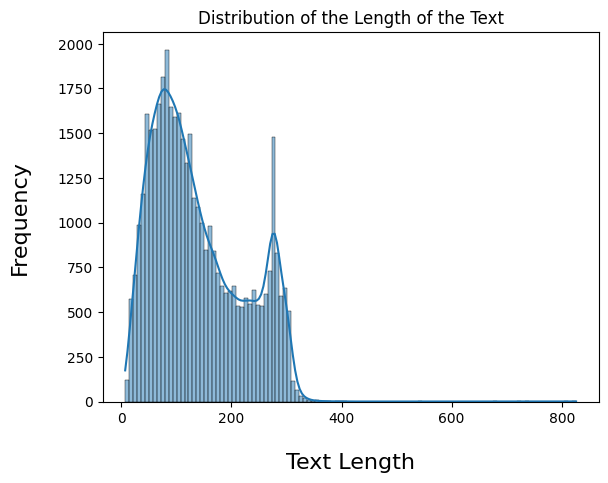

In [209]:
# for column 'Text', create a feature for the length of the text
# and plot the distribution of the length of the text
# create a new column for the length of the text
df['text_length'] = df['Text'].apply(lambda x: len(x))
# plot the distribution of the length of the text
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of the Length of the Text')
plt.xlabel('Text Length', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show() 

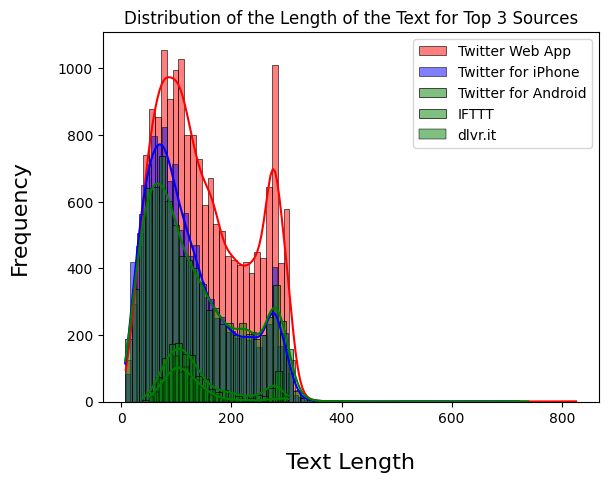

In [210]:
# plot the distribution of the length of the text for each source
sns.histplot(df[df['Source'] == top5_sources[0]]['text_length'], kde=True, color='red', label=top5_sources[0])
sns.histplot(df[df['Source'] == top5_sources[1]]['text_length'], kde=True, color='blue', label=top5_sources[1])
sns.histplot(df[df['Source'] == top5_sources[2]]['text_length'], kde=True, color='green', label=top5_sources[2])
sns.histplot(df[df['Source'] == top5_sources[3]]['text_length'], kde=True, color='green', label=top5_sources[3])
sns.histplot(df[df['Source'] == top5_sources[4]]['text_length'], kde=True, color='green', label=top5_sources[4])
plt.title('Distribution of the Length of the Text for Top 3 Sources')
plt.xlabel('Text Length', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.legend()

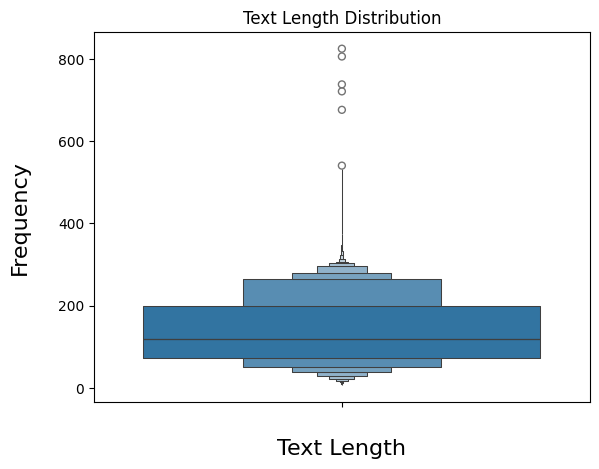

In [211]:
sns.boxenplot(y='text_length', data=df)
plt.title('Text Length Distribution')
plt.xlabel('Text Length', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

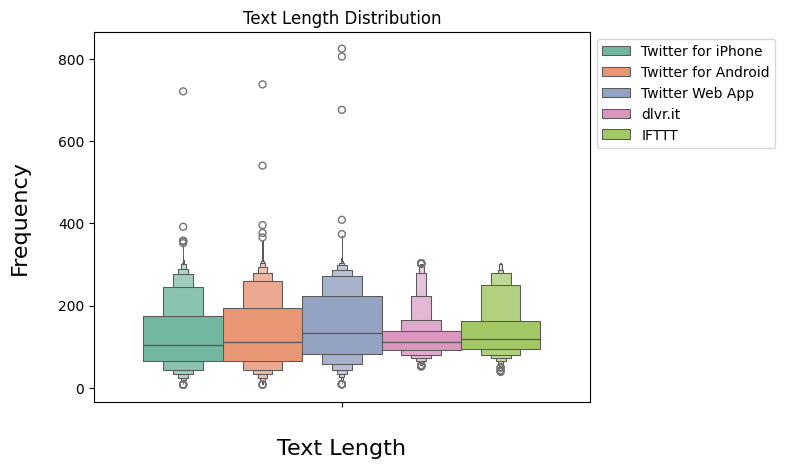

In [213]:
sns.boxenplot(y='text_length',hue='Source', data=df, palette='Set2')
plt.title('Text Length Distribution')
plt.xlabel('Text Length', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
# legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

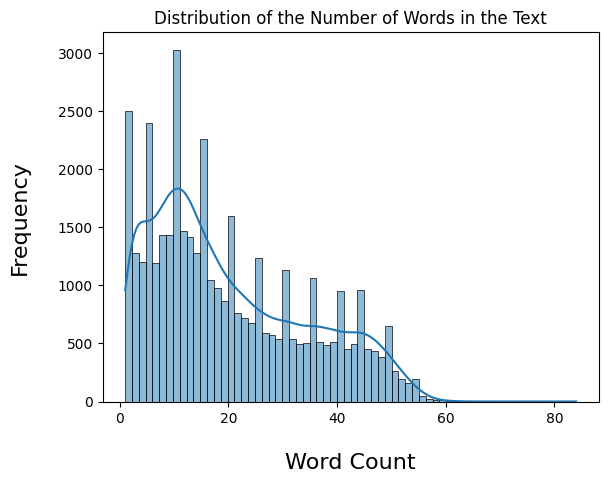

In [215]:
# do the same for the 'Text' column concerning number of words
# create a new column for the number of words in the text
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))
# plot the distribution of the number of words in the text
sns.histplot(df['word_count'], kde=True)
plt.title('Distribution of the Number of Words in the Text')
plt.xlabel('Word Count', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

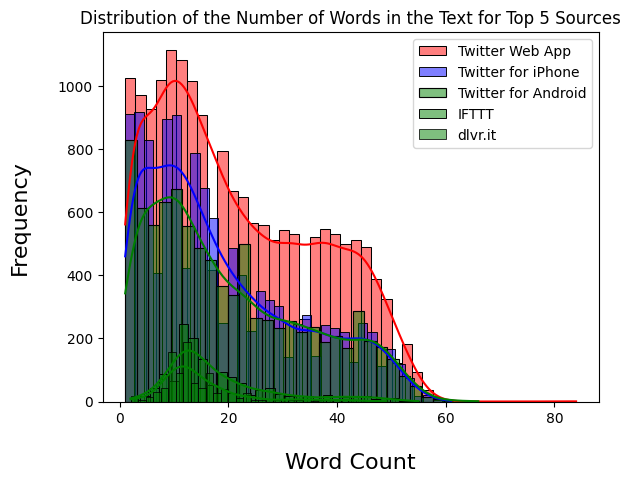

In [223]:
# plot the distribution of the number of words in the text for each source
sns.histplot(df[df['Source'] == top5_sources[0]]['word_count'], kde=True, color='red', label=top5_sources[0])
sns.histplot(df[df['Source'] == top5_sources[1]]['word_count'], kde=True, color='blue', label=top5_sources[1])
sns.histplot(df[df['Source'] == top5_sources[2]]['word_count'], kde=True, color='green', label=top5_sources[2])
sns.histplot(df[df['Source'] == top5_sources[3]]['word_count'], kde=True, color='green', label=top5_sources[3])
sns.histplot(df[df['Source'] == top5_sources[4]]['word_count'], kde=True, color='green', label=top5_sources[4])
plt.title('Distribution of the Number of Words in the Text for Top 5 Sources')
plt.xlabel('Word Count', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.legend()
plt.show()

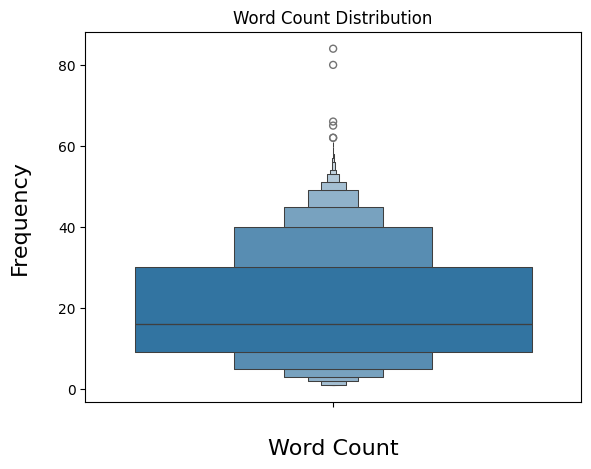

In [162]:
sns.boxenplot(y='word_count', data=df)
plt.title('Word Count Distribution')
plt.xlabel('Word Count', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

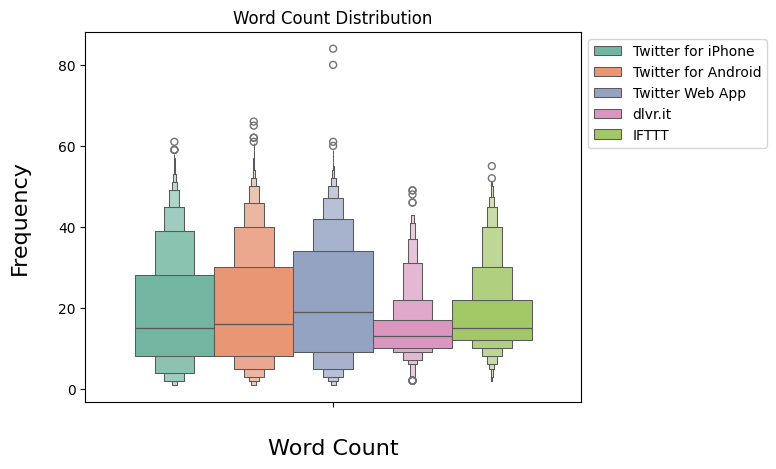

In [217]:
# boxen plot for the number of words in the text for each source
sns.boxenplot(y='word_count',hue='Source', data=df, palette='Set2')
plt.title('Word Count Distribution')
plt.xlabel('Word Count', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
# legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

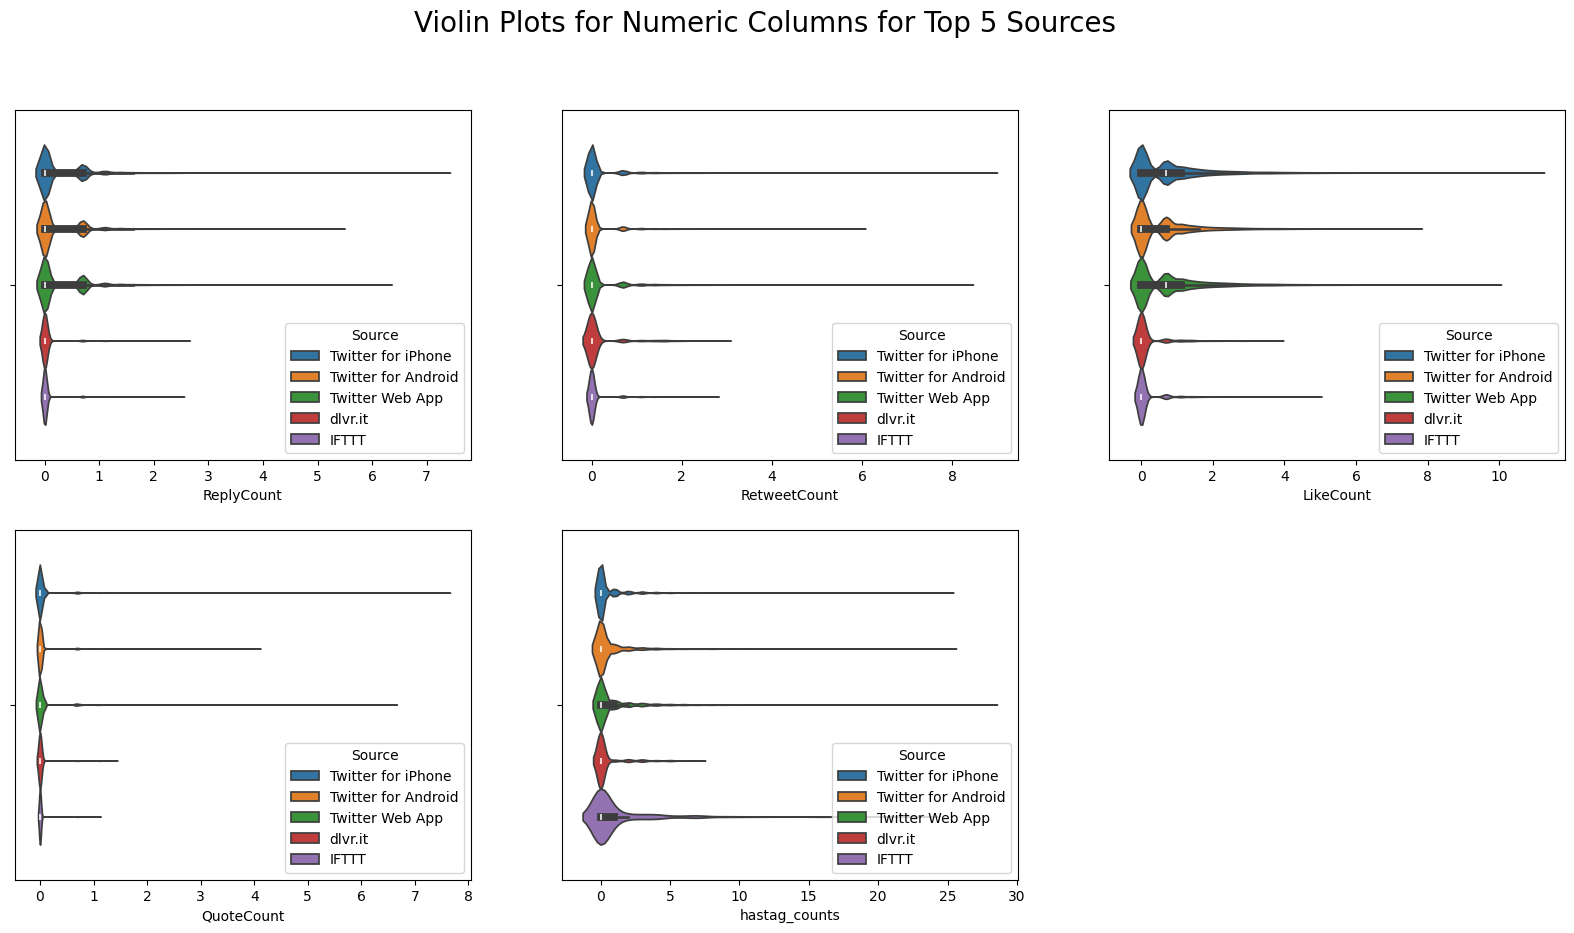

In [222]:
# redo the violin plot for the numeric columns with subplots for the top 5 sources
plt.figure(figsize=(20, 10))
# put a general title for all the subplots
plt.suptitle('Violin Plots for Numeric Columns for Top 5 Sources', fontsize=20)
plt.subplot(2, 3, 1)
sns.violinplot(x='ReplyCount', data=df, hue='Source')
plt.subplot(2, 3, 2)
sns.violinplot(x='RetweetCount', data=df, hue='Source')
plt.subplot(2, 3, 3)
sns.violinplot(x='LikeCount', data=df, hue='Source')
plt.subplot(2, 3, 4)
sns.violinplot(x='QuoteCount', data=df, hue='Source')
plt.subplot(2, 3, 5)
sns.violinplot(x='hastag_counts', data=df, hue='Source')
plt.show()

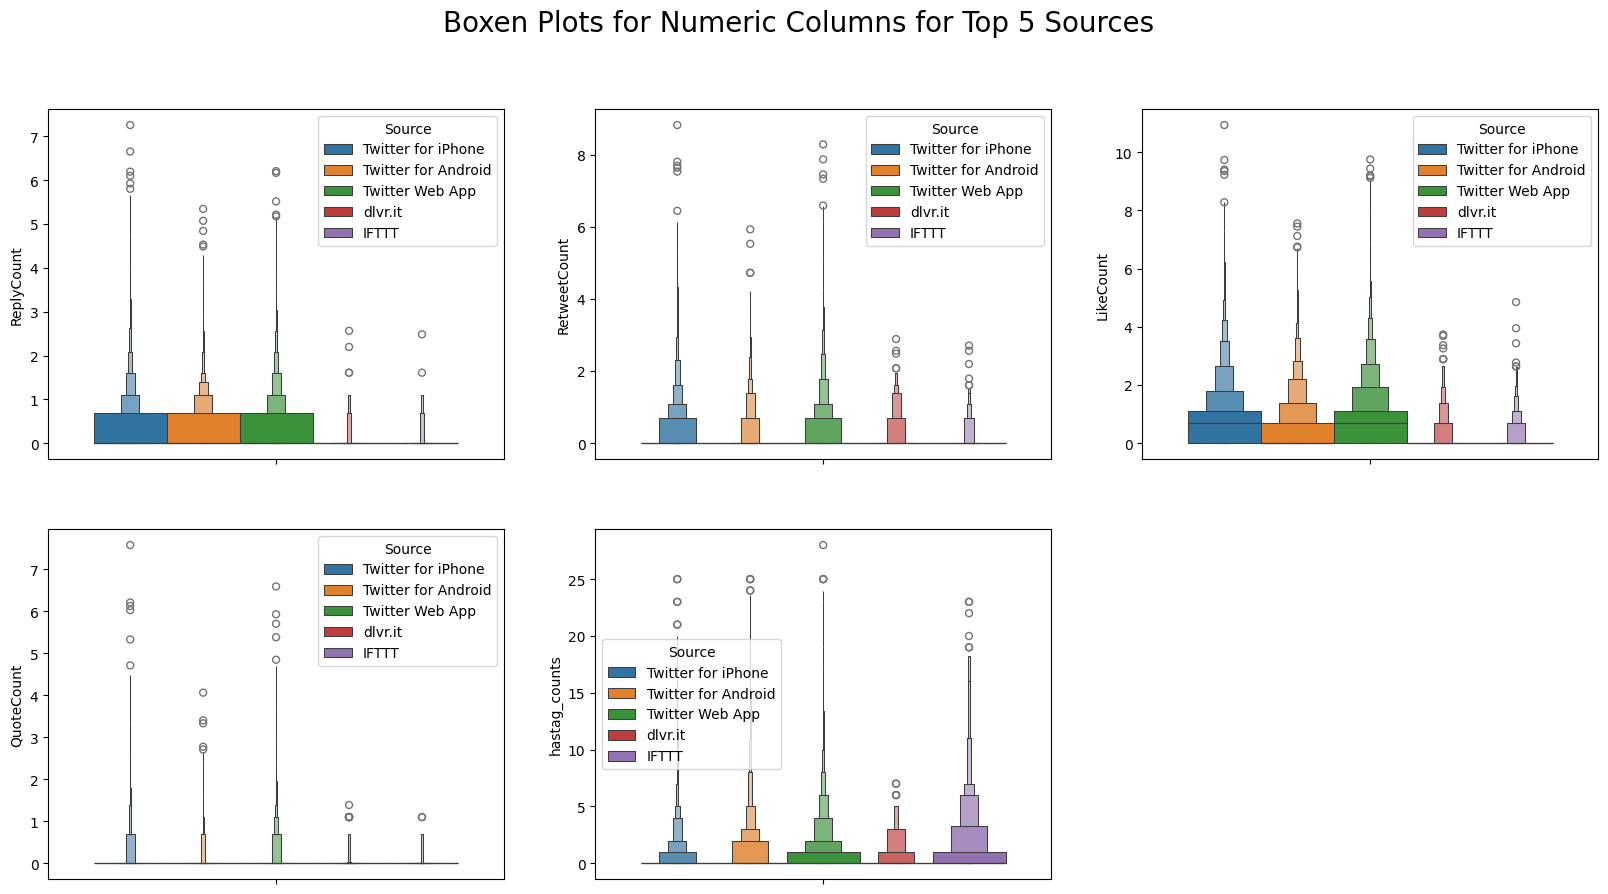

In [224]:
# do the same for the boxen plot for the numeric columns with subplots for the top 5 sources
plt.figure(figsize=(20, 10))
# put a general title for all the subplots
plt.suptitle('Boxen Plots for Numeric Columns for Top 5 Sources', fontsize=20)
plt.subplot(2, 3, 1)
sns.boxenplot(y='ReplyCount', data=df, hue='Source')
plt.subplot(2, 3, 2)
sns.boxenplot(y='RetweetCount', data=df, hue='Source')
plt.subplot(2, 3, 3)
sns.boxenplot(y='LikeCount', data=df, hue='Source')
plt.subplot(2, 3, 4)
sns.boxenplot(y='QuoteCount', data=df, hue='Source')
plt.subplot(2, 3, 5)
sns.boxenplot(y='hastag_counts', data=df, hue='Source')
plt.show()

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tweet Id,50001.0,1.617493e+18,1.725682e+14,1.617156e+18,1.617354e+18,1.617525e+18,1.617625e+18,1.617779e+18
ReplyCount,50001.0,2.512216e-01,5.078618e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.931472e-01,8.038835e+00
RetweetCount,50001.0,1.877414e-01,5.550591e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.827028e+00
LikeCount,50001.0,6.639574e-01,1.011035e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.098612e+00,1.093443e+01
QuoteCount,50001.0,4.635289e-02,2.502184e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.574558e+00
ConversationId,50001.0,1.617205e+18,1.005075e+16,6.493609e+17,1.617302e+18,1.617504e+18,1.617607e+18,1.617779e+18
hastag_counts,50001.0,7.833043e-01,1.975040e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.800000e+01
text_length,50001.0,1.408053e+02,8.051654e+01,7.000000e+00,7.700000e+01,1.210000e+02,2.000000e+02,8.260000e+02
word_count,50001.0,2.007598e+01,1.395986e+01,1.000000e+00,9.000000e+00,1.600000e+01,3.000000e+01,8.400000e+01


In [118]:
# filtering by just the top 1 language
df[df['Language'] == 'en'].describe().T

,count,mean,std,min,25%,50%,75%,max
Tweet Id,32076.0,1.617492e+18,1.733662e+14,1.617156e+18,1.617347e+18,1.617530e+18,1.617624e+18,1.617779e+18
ReplyCount,32076.0,2.672525e-01,5.350026e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.931472e-01,8.038835e+00
RetweetCount,32076.0,1.862255e-01,5.569127e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.827028e+00
LikeCount,32076.0,6.527947e-01,1.011331e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.098612e+00,1.093443e+01
QuoteCount,32076.0,4.852864e-02,2.654305e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.574558e+00
ConversationId,32076.0,1.617183e+18,1.053345e+16,6.493609e+17,1.617290e+18,1.617506e+18,1.617605e+18,1.617779e+18
hastag_counts,32076.0,8.562165e-01,2.122756e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.800000e+01
text_length,32076.0,1.487148e+02,8.159720e+01,7.000000e+00,8.200000e+01,1.290000e+02,2.160000e+02,8.260000e+02
word_count,32076.0,2.256450e+01,1.362459e+01,1.000000e+00,1.100000e+01,1.900000e+01,3.300000e+01,8.400000e+01


In [119]:
# filtering by just japanese
df[df['Language'] == 'ja'].describe().T

,count,mean,std,min,25%,50%,75%,max
Tweet Id,5046.0,1.617522e+18,1.771946e+14,1.617156e+18,1.617376e+18,1.617518e+18,1.617696e+18,1.617779e+18
ReplyCount,5046.0,1.388388e-01,3.106105e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.806662e+00
RetweetCount,5046.0,1.644523e-01,5.349258e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.291045e+00
LikeCount,5046.0,7.471652e-01,1.010896e+00,0.000000e+00,0.000000e+00,6.931472e-01,1.098612e+00,9.749812e+00
QuoteCount,5046.0,4.559376e-02,2.319858e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.379897e+00
ConversationId,5046.0,1.617086e+18,1.594106e+16,8.664434e+17,1.617368e+18,1.617512e+18,1.617693e+18,1.617779e+18
hastag_counts,5046.0,2.881490e-01,8.768616e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01
text_length,5046.0,8.790468e+01,4.534211e+01,9.000000e+00,5.200000e+01,8.000000e+01,1.200000e+02,2.770000e+02
word_count,5046.0,3.721760e+00,3.442443e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,4.700000e+01


In [120]:
# filtering by just spanish
df[df['Language'] == 'es'].describe().T

,count,mean,std,min,25%,50%,75%,max
Tweet Id,3315.0,1.617494e+18,1.689025e+14,1.617156e+18,1.617354e+18,1.617538e+18,1.617622e+18,1.617779e+18
ReplyCount,3315.0,2.262154e-01,4.694840e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.912655e+00
RetweetCount,3315.0,2.127060e-01,5.622437e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.533389e+00
LikeCount,3315.0,6.050462e-01,9.675187e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.931472e-01,6.755769e+00
QuoteCount,3315.0,4.170300e-02,2.082149e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.564949e+00
ConversationId,3315.0,1.617306e+18,4.159646e+15,1.392181e+18,1.617316e+18,1.617526e+18,1.617612e+18,1.617779e+18
hastag_counts,3315.0,5.960784e-01,1.545737e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.400000e+01
text_length,3315.0,1.502739e+02,7.562978e+01,1.400000e+01,9.300000e+01,1.330000e+02,2.050000e+02,3.920000e+02
word_count,3315.0,2.242021e+01,1.246922e+01,2.000000e+00,1.300000e+01,1.900000e+01,3.100000e+01,6.000000e+01


In [121]:
# filtering by just portuguese
df[df['Language'] == 'pt'].describe().T

,count,mean,std,min,25%,50%,75%,max
Tweet Id,1175.0,1.617486e+18,1.730473e+14,1.617157e+18,1.617327e+18,1.617537e+18,1.617625e+18,1.617778e+18
ReplyCount,1175.0,2.511753e-01,4.514156e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.931472e-01,3.663562e+00
RetweetCount,1175.0,1.402044e-01,4.433808e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.891820e+00
LikeCount,1175.0,6.672849e-01,1.007073e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.098612e+00,6.672033e+00
QuoteCount,1175.0,3.598162e-02,1.992414e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.639057e+00
ConversationId,1175.0,1.617166e+18,9.668494e+15,1.286310e+18,1.617305e+18,1.617529e+18,1.617619e+18,1.617775e+18
hastag_counts,1175.0,3.634043e-01,1.108211e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
text_length,1175.0,1.269362e+02,7.505157e+01,1.300000e+01,6.900000e+01,1.060000e+02,1.740000e+02,3.270000e+02
word_count,1175.0,2.010638e+01,1.235815e+01,3.000000e+00,1.100000e+01,1.600000e+01,2.800000e+01,5.700000e+01


In [122]:
# selecting just the english tweets
df_en = df[df['Language'] == 'en'].reset_index(drop=True)

In [123]:
df_en.head(5)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,text_length,word_count
0,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,0.693147,0.000000,...,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0,96,15
1,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0.000000,0.000000,...,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0,50,6
2,2023-01-22 13:45:03+00:00,1617156389217894400,ChatGPT runs 10K Nvidia training GPUs with pot...,FierceElectron,https://twitter.com/FierceElectron/status/1617...,https://twitter.com/FierceElectron,['https://www.fierceelectronics.com/sensors/ch...,['https://t.co/Uhq62t0Uw4'],0.000000,0.000000,...,1617156389217894400,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,[],0,95,12
3,2023-01-22 13:45:04+00:00,1617156393898745858,@SWENGDAD There is repetitive work in every jo...,xlr8harder,https://twitter.com/xlr8harder/status/16171563...,https://twitter.com/xlr8harder,NaN,NaN,0.693147,0.000000,...,1617149595901104130,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='SWENGDAD', id=1460452950875193...",[],0,170,30
4,2023-01-22 13:45:06+00:00,1617156404137295878,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,https://twitter.com/Kosuke_dazo,['https://oriori.my.canva.site/'],['https://t.co/gtWdNZ0laM'],0.000000,0.693147,...,1617156404137295878,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#ChatGPT', '#midjourney']",2,136,14


In [124]:
# removing stop words
stop_words = set(stopwords.words('english'))
# function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
# remove stopwords
df_en['Text'] = df_en['Text'].apply(lambda text: remove_stopwords(text))


In [125]:
# function to remove urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
# remove urls
df_en['Text'] = df_en['Text'].apply(lambda text: remove_urls(text))

In [126]:
df_en['Text'].head()

0    @AlexandrovnaIng Prohibition ChatGPT added hon...
1                                  Bow chatGPT 🫡..... 
2    ChatGPT runs 10K Nvidia training GPUs potentia...
3    @SWENGDAD There repetitive work every job, lot...
4    I created fictional jewelry brand using ChatGP...
Name: Text, dtype: object

In [127]:
# function to apply lower case and remove punctuation
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text
# apply the preprocessing
df_en['Text'] = df_en['Text'].apply(lambda text: preprocess_text(text))
# function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
# remove emojis
df_en['Text'] = df_en['Text'].apply(lambda text: remove_emojis(text))

In [128]:
# function to remove special characters
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text
# remove special characters
df_en['Text'] = df_en['Text'].apply(lambda text: remove_special_characters(text))

In [129]:
df_en['Text'].head()

0    alexandrovnaing prohibition chatgpt added hono...
1                                        bow chatgpt  
2    chatgpt runs 10k nvidia training gpus potentia...
3    swengdad there repetitive work every job lots ...
4    i created fictional jewelry brand using chatgp...
Name: Text, dtype: object

In [130]:
# function to lemmatize the text
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
# lemmatize the text
df_en['Text'] = df_en['Text'].apply(lambda text: lemmatize_text(text))


- **TextBlob**: A Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks.
- **Polarity**: A float within the range [-1.0, 1.0], where:
-1.0 indicates a very negative sentiment.
0.0 indicates a neutral sentiment.
1.0 indicates a very positive sentiment.

In [131]:
# performe sentiment analysis
# function
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
# apply the function
df_en['sentiment'] = df_en['Text'].apply(lambda text: get_sentiment(text))

In [132]:
df_en['sentiment'].head()

0    0.000000
1    0.000000
2    0.000000
3   -0.083333
4    0.000000
Name: sentiment, dtype: float64

- Subjectivity: A float within the range [0.0, 1.0], where:
1. 0.0 indicates that the text is very objective (factual).
2. 1.0 indicates that the text is very subjective (opinion-based).

In [133]:
# function to get the subjectivity
def get_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity
# apply the function
df_en['subjectivity'] = df_en['Text'].apply(lambda text: get_subjectivity(text))


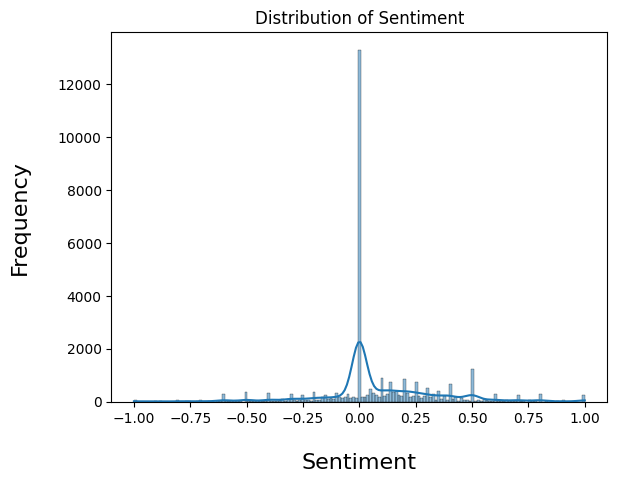

In [134]:
# plot the distribution of the sentiment
sns.histplot(df_en['sentiment'], kde=True)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

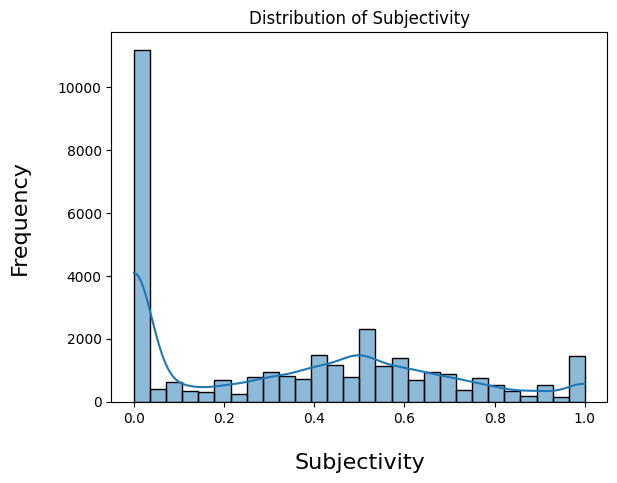

In [135]:
# plot the distribution of the subjectivity
sns.histplot(df_en['subjectivity'], kde=True)
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

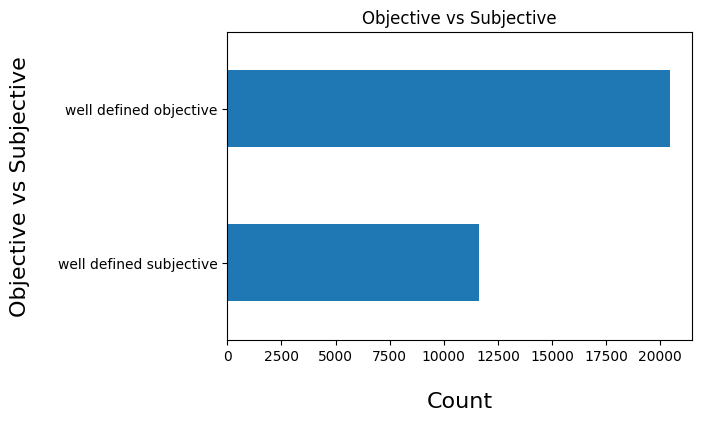

In [149]:
df_en['cat_subjec']=df_en['subjectivity'].transform(lambda x: 'well defined objective' if x < 0.5 else 'well defined subjective')
df_en['cat_subjec'].value_counts().sort_values().plot(kind='barh', figsize=(6, 4))
plt.title('Objective vs Subjective')
plt.xlabel('Count', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Objective vs Subjective', labelpad=20, fontsize=16)
plt.show()

In [136]:
# function to get the polarity
def get_polarity(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'
# apply the function
df_en['polarity'] = df_en['sentiment'].apply(lambda score: get_polarity(score))


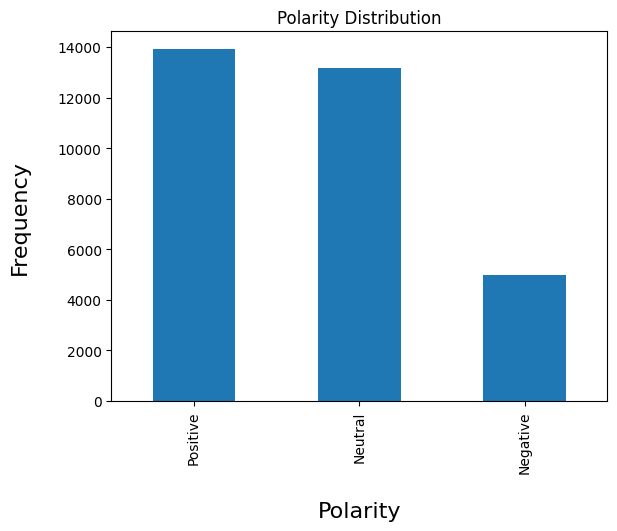

In [137]:
# plot the distribution of the polarity
df_en['polarity'].value_counts().plot(kind='bar')
plt.title('Polarity Distribution')
plt.xlabel('Polarity', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

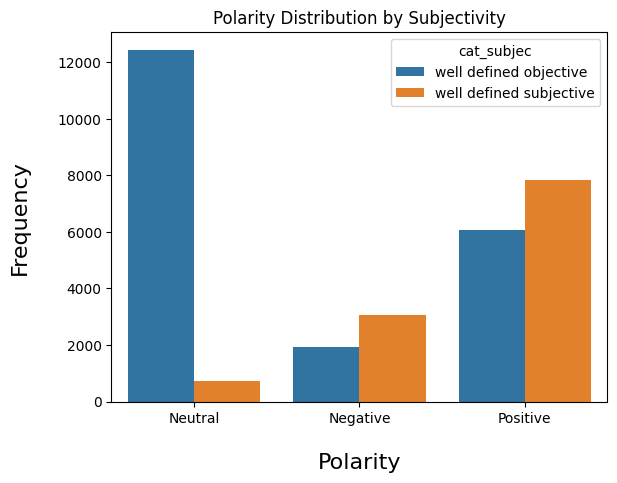

In [159]:
sns.countplot(x='polarity', data=df_en, hue='cat_subjec')
plt.title('Polarity Distribution by Subjectivity')
plt.xlabel('Polarity', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Frequency', labelpad=20, fontsize=16)
plt.show()

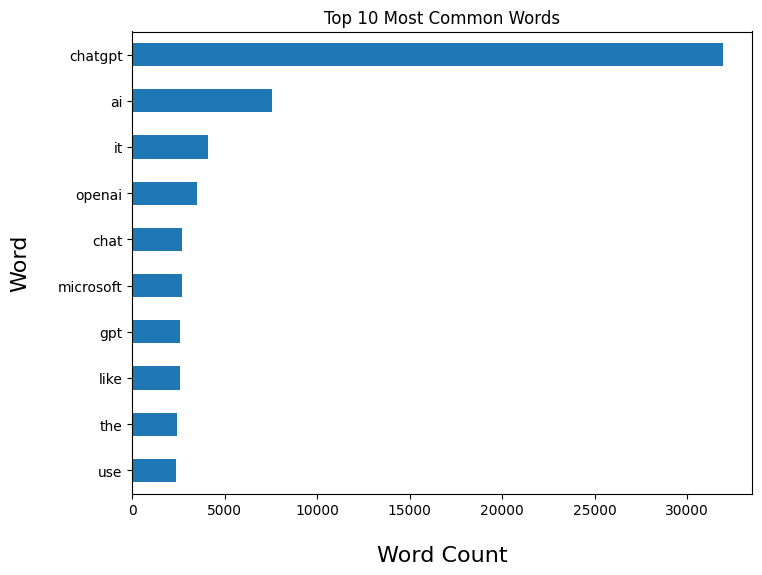

In [138]:
# bag of word for the text column
# create an instance of the CountVectorizer
cv = CountVectorizer()
# fit the CountVectorizer to the text column
X = cv.fit_transform(df_en['Text'])
# create a DataFrame from the CountVectorizer output
df_bow = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
df_bow.head()
# plot the most common words
df_bow.sum().sort_values(ascending=False).iloc[:10].sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Most Common Words')
plt.xlabel('Word Count', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Word', labelpad=20, fontsize=16)
plt.show()


In [139]:
# function to get the top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# get the top 20 words
top_words = get_top_n_words(df_en['Text'], n=20)
# create a DataFrame
df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
df_top_words.head(10)

,Word,Frequency
0,chatgpt,31926
1,ai,7569
2,it,4083
3,openai,3518
4,chat,2673
5,microsoft,2672
6,gpt,2567
7,like,2554
8,the,2422
9,use,2341


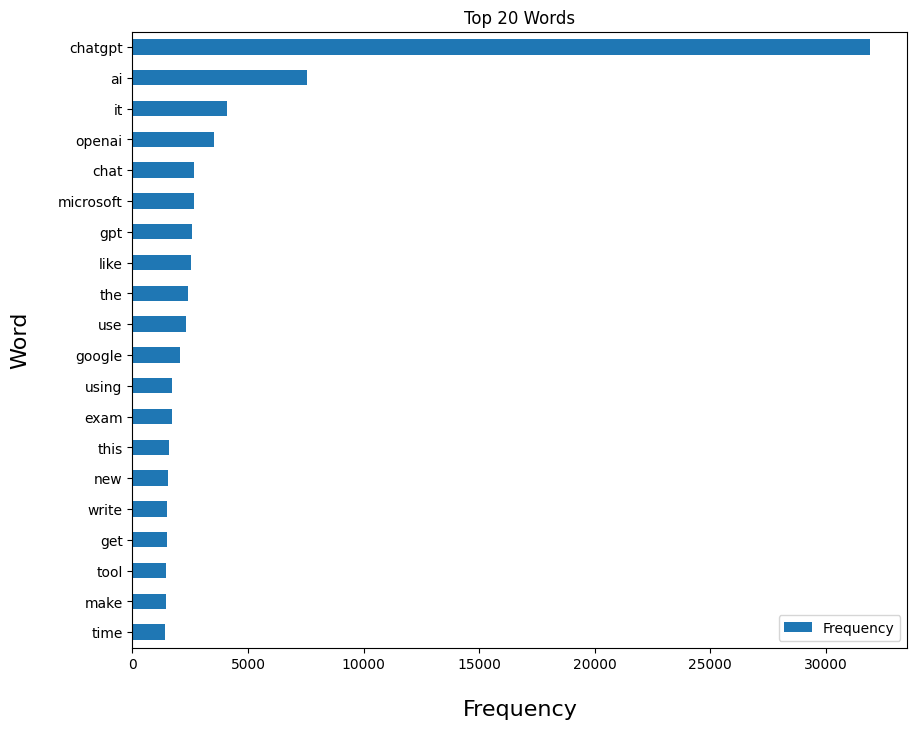

In [140]:
# plot the top 20 words
df_top_words.sort_values(by=['Frequency']).set_index('Word').plot(kind='barh', figsize=(10, 8))
plt.title('Top 20 Words')
plt.xlabel('Frequency', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Word', labelpad=20, fontsize=16)
plt.show()

In [141]:
# function to get the top n bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# get the top 20 bigrams
top_bigrams = get_top_n_bigram(df_en['Text'], n=20)
# create a DataFrame
df_top_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
df_top_bigrams.head(10)

,Bigram,Frequency
0,chat gpt,2319
1,use chatgpt,907
2,using chatgpt,830
3,chatgpt ai,776
4,artificial intelligence,682
5,chatgpt write,606
6,like chatgpt,601
7,asked chatgpt,596
8,ai chatgpt,569
9,mba exam,503


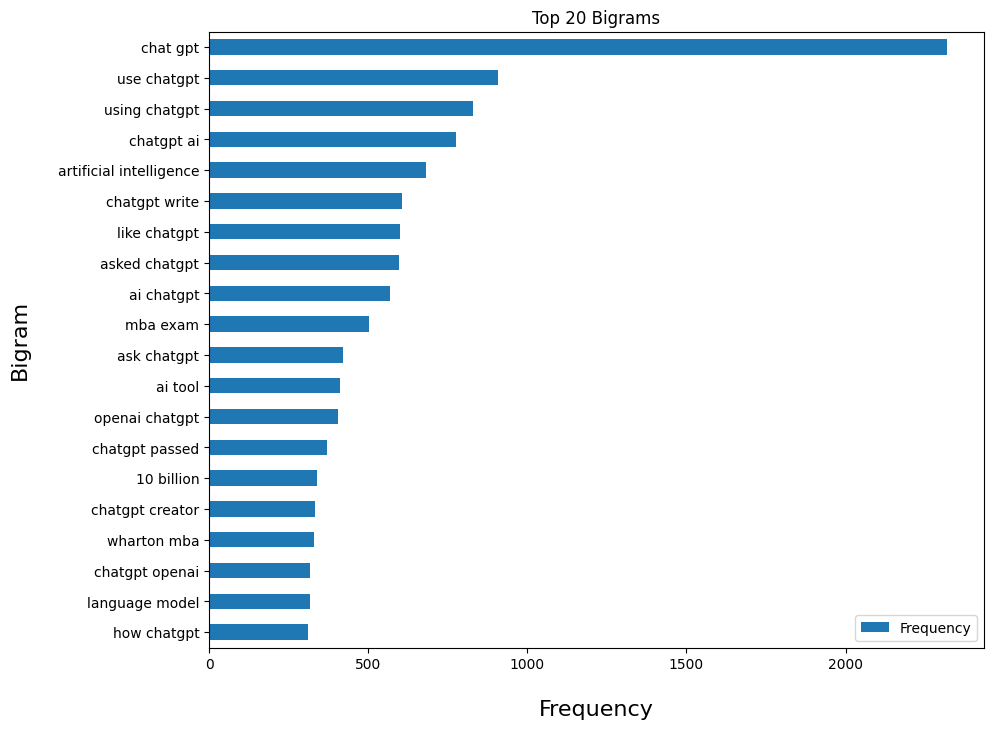

In [142]:
# plot the top 20 bigrams
df_top_bigrams.sort_values(by=['Frequency']).set_index('Bigram').plot(kind='barh', figsize=(10, 8))
plt.title('Top 20 Bigrams')
plt.xlabel('Frequency', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Bigram', labelpad=20, fontsize=16)
plt.show()

In [143]:
# function to get the top n trigrams
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# get the top 20 trigrams
top_trigrams = get_top_n_trigram(df_en['Text'], n=20)
# create a DataFrame
df_top_trigrams = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])
df_top_trigrams.head(10)

,Trigram,Frequency
0,chatgpt creator openai,243
1,wharton mba exam,241
2,medical licensing exam,227
3,chatgpt maker openai,220
4,multibillion dollar investment,190
5,microsoft invests billion,181
6,tool like chatgpt,171
7,investment chatgptmaker openai,160
8,billion chatgpt creator,152
9,united state medical,146


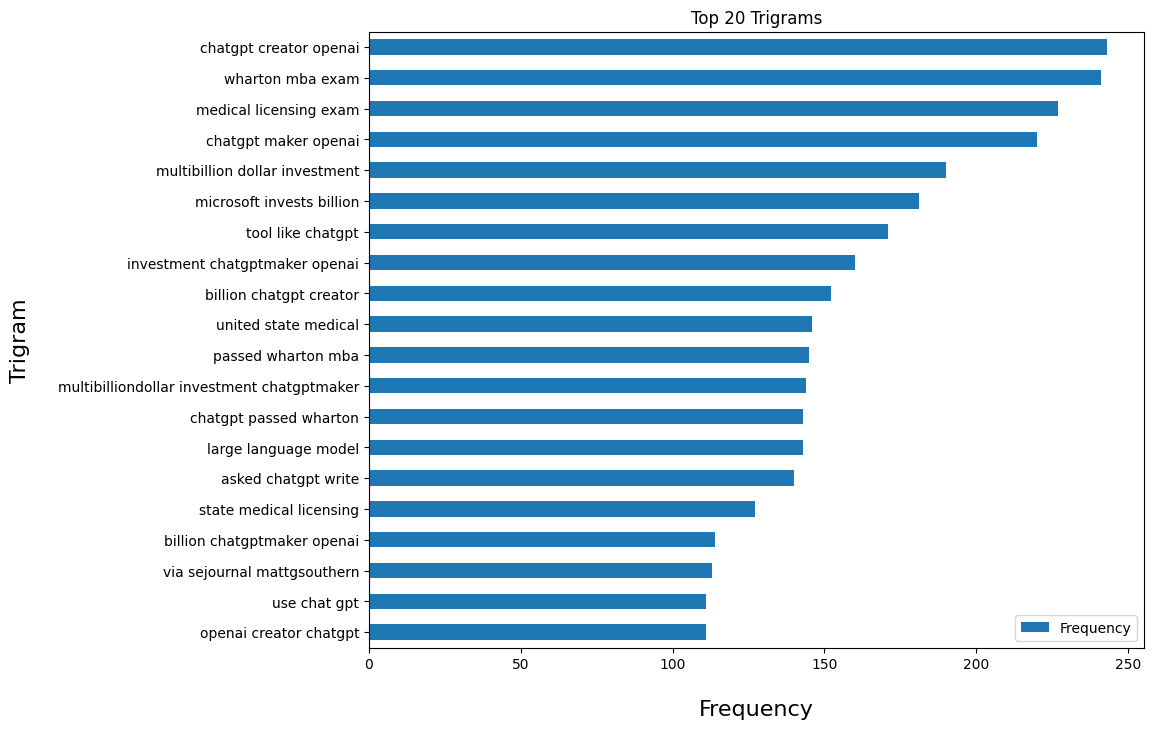

In [144]:
# plot the top 20 trigrams
df_top_trigrams.sort_values(by=['Frequency']).set_index('Trigram').plot(kind='barh', figsize=(10, 8))
plt.title('Top 20 Trigrams')
plt.xlabel('Frequency', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Trigram', labelpad=20, fontsize=16)
plt.show()

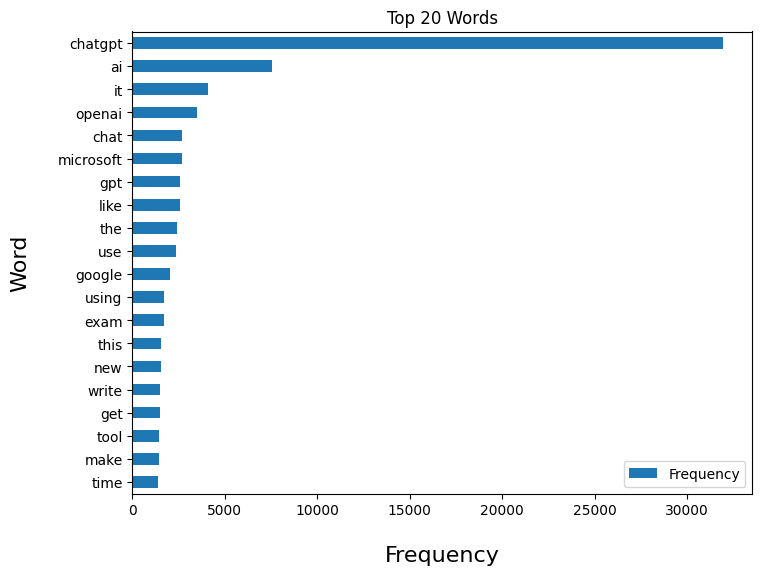

In [145]:
# try another approach, do not use word cloud, to plot the most common words in the text column
# create an instance of the TfidfVectorizer
tfidf = TfidfVectorizer()
# fit the TfidfVectorizer to the text column
X = tfidf.fit_transform(df_en['Text'])
# create a DataFrame from the TfidfVectorizer output
df_tfidf = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
# get the top 20 words
top_words = get_top_n_words(df_en['Text'], n=20)
# create a DataFrame
df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
df_top_words.head()
# plot the top 20 words
df_top_words.sort_values(by=['Frequency']).set_index('Word').plot(kind='barh', figsize=(8, 6))
plt.title('Top 20 Words')
plt.xlabel('Frequency', rotation=0, labelpad=20, fontsize=16)
plt.ylabel('Word', labelpad=20, fontsize=16)
plt.show()
 
